# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Raul Araju Korogi Oliveira e Gabriel Limas Nunes
### **Matrículas:**  2021032110 e 2021032048


### **Tema:** Saúde Fetal
### **Base de dados:** https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/


**Todas as células que não possuem comentários que indiquem ter sido criadas manualmente ou alteradas, foram geradas através de iterações com o ChatGPT, com mudanças muito pequenas como nomes de variáveis.**

## **ChatGPT Links**

**Business Understanding** 

**Data Understanding:** 

**Data Preparation:** 

**Modeling:** 

**Evaluation:** 


## Imports

In [1]:
#Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


In [2]:
warnings.simplefilter(action='ignore')

# **Introdução**

# **Motivação**

# **Objetivo**

## **Geral**


## **Específicos**

# **Metodologia**

# **Desenvolvimento**


## **2. Data understanding (Entendimento dos dados)**


### Informações Básicas

#### Carregar csv

In [3]:
#Carregando a base de dados
df = pd.read_csv('./fetal_health.csv', delimiter=',', encoding='utf-8')

#### Explorar o Dataframe

In [4]:
df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Os atributos dessa base são:
- baseline value: Fetal heart rate baseline (beats per minute)
- accelerations: Number of accelerations per second
- fetal_movement: Number of fetal movements per second
- uterine_contractions: Number of uterine contractions per second
- light_decelerations: Number of light decelerations per second
- severe_decelerations: Number of severe decelerations per second
- prolongued_decelerations: Number of prolonged decelerations per second
- abnormal_short_term_variability: Percentage of time with abnormal short-term variability
- mean_value_of_short_term_variability: Mean value of short-term variability
- percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long-term variability
- mean_value_of_long_term_variability: Mean value of long-term variability
- histogram_width: Width of FHR histogram
- histogram_min: Minimum of FHR histogram
- histogram_max: Maximum of FHR histogram
- histogram_number_of_peaks: Number of FHR histogram peaks
- histogram_number_of_zeroes: Number of FHR histogram zeroes
- histogram_mode: FHR histogram mode
- histogram_mean: FHR histogram mean
- histogram_median: FHR histogram median
- histogram_variance: FHR histogram variance
- histogram_tendency: FHR histogram tendency
- fetal_health: Fetal state class code (1=Normal, 2=Suspected, 3=Pathological)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### Entendimento do Alvo

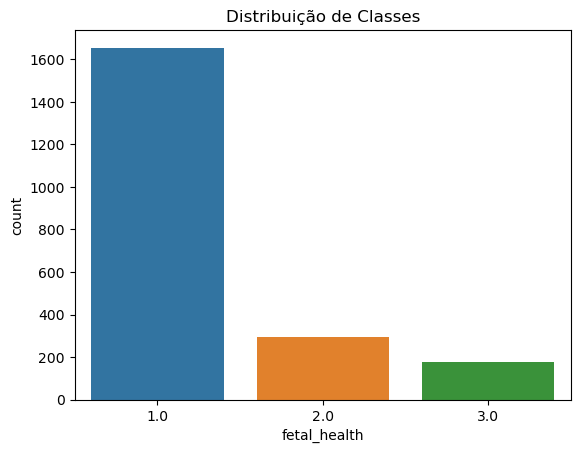

In [6]:
sns.countplot(x='fetal_health', data=df)
plt.title('Distribuição de Classes')
plt.show()

#### Estatísticas Descritivas

In [7]:
print(df.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

#### Matriz de Correlação

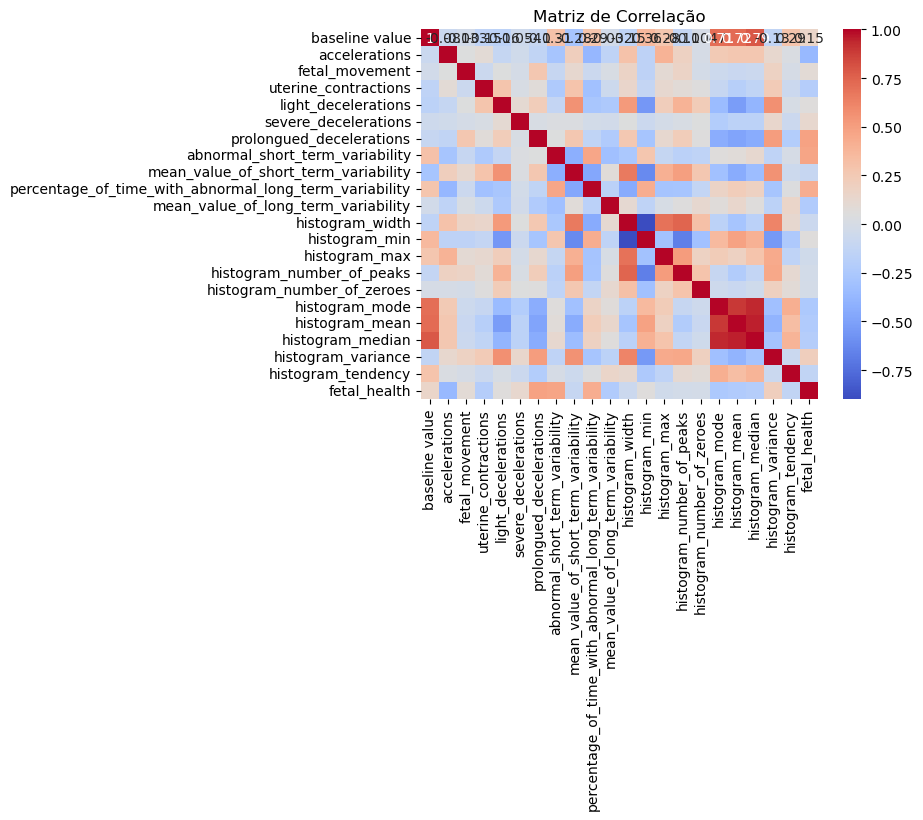

In [8]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


#### Análise de Variáveis Relacionadas ao Ritmo Cardíaco Fetal

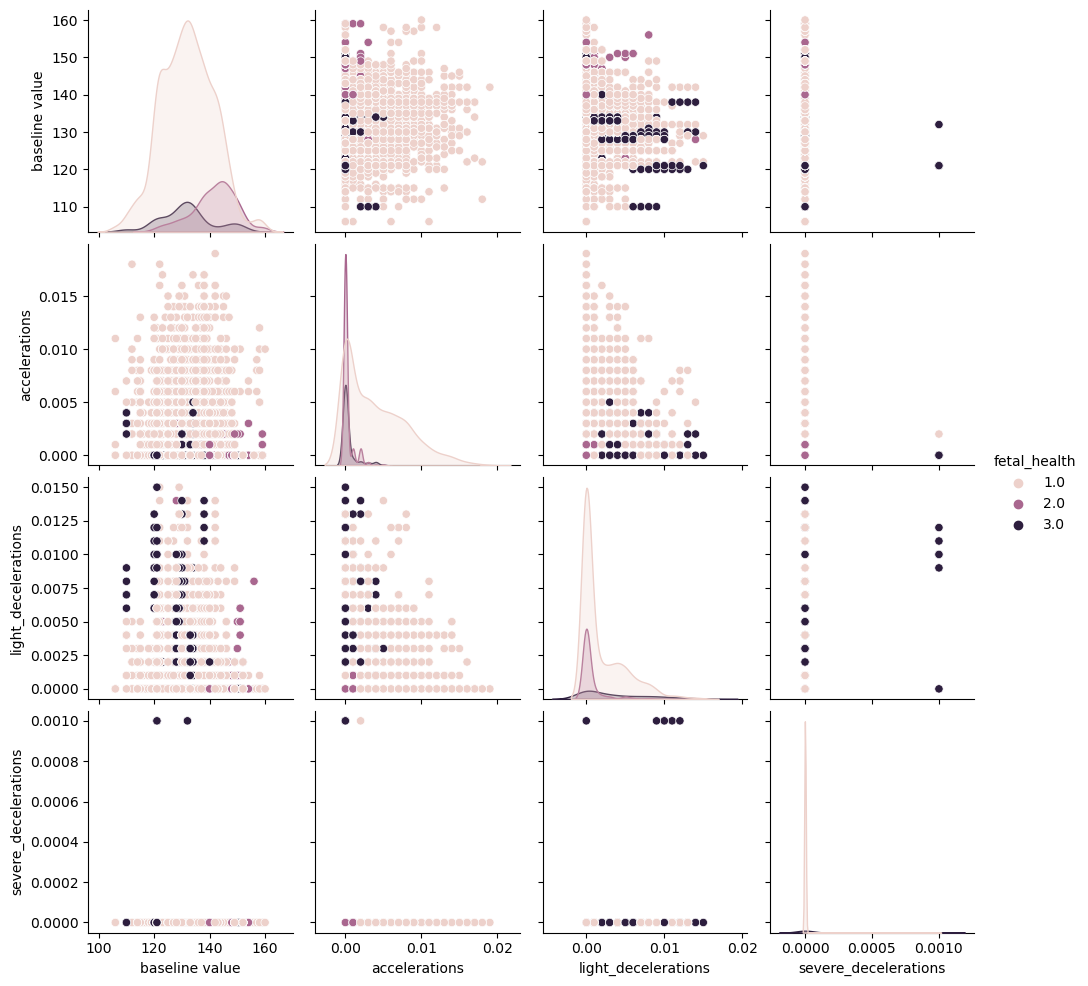

In [9]:
fhr_variables = ['baseline value', 'accelerations', 'light_decelerations', 'severe_decelerations']
sns.pairplot(df, hue='fetal_health', vars=fhr_variables)
plt.show()

#### Análise de Variáveis de Variabilidade

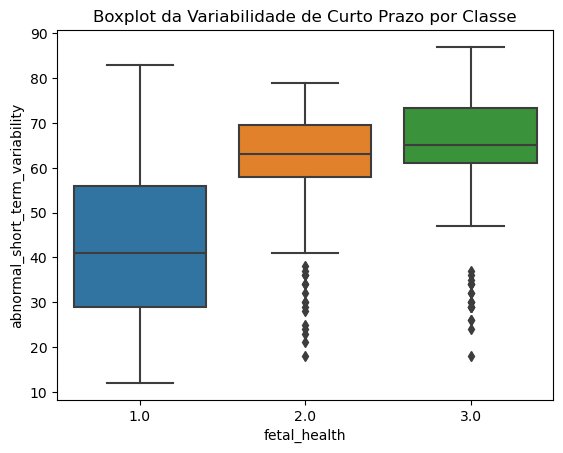

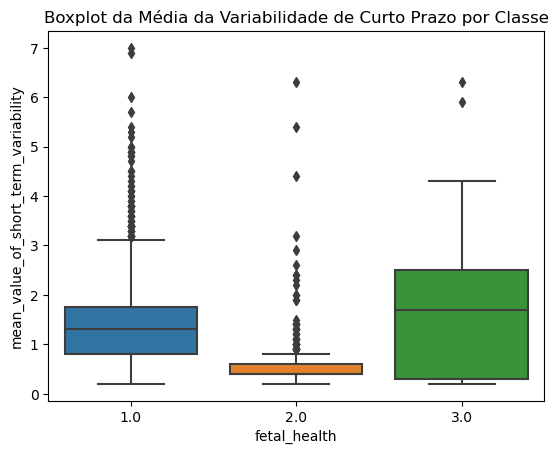

In [10]:
variability_variables = ['abnormal_short_term_variability', 'mean_value_of_short_term_variability']
sns.boxplot(x='fetal_health', y='abnormal_short_term_variability', data=df)
plt.title('Boxplot da Variabilidade de Curto Prazo por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df)
plt.title('Boxplot da Média da Variabilidade de Curto Prazo por Classe')
plt.show()

#### Análise de Variáveis de Histograma

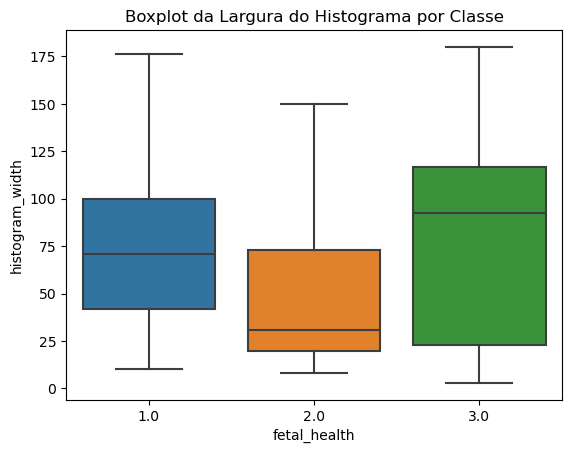

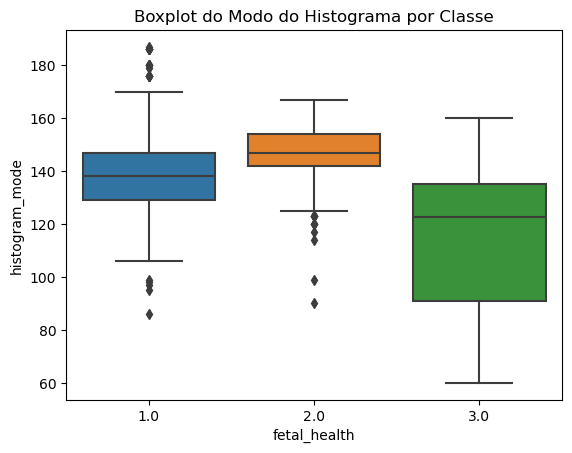

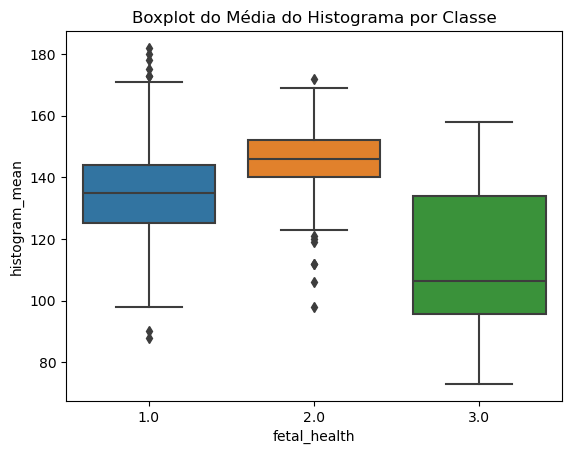

In [11]:
histogram_variables = ['histogram_width', 'histogram_mode', 'histogram_mean']
sns.boxplot(x='fetal_health', y='histogram_width', data=df)
plt.title('Boxplot da Largura do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mode', data=df)
plt.title('Boxplot do Modo do Histograma por Classe')
plt.show()

sns.boxplot(x='fetal_health', y='histogram_mean', data=df)
plt.title('Boxplot do Média do Histograma por Classe')
plt.show()

#### Análise de Tendências

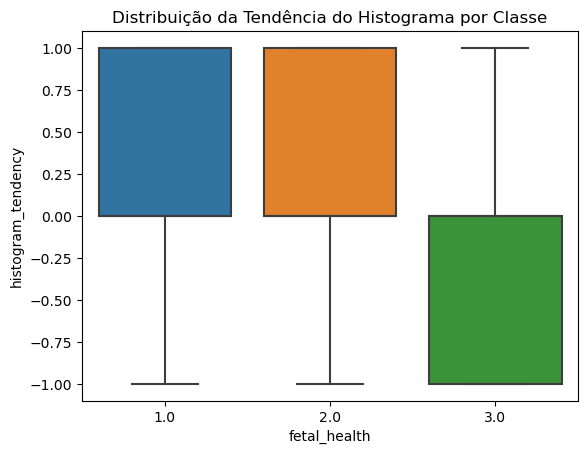

In [12]:
sns.boxplot(x='fetal_health', y='histogram_tendency', data=df)
plt.title('Distribuição da Tendência do Histograma por Classe')
plt.show()

## **3. Data preparation (Preparação dos dados)**

#### Tratamento de Dados Ausentes

In [13]:
print(df.isnull().sum())

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### Visualização de Outliers

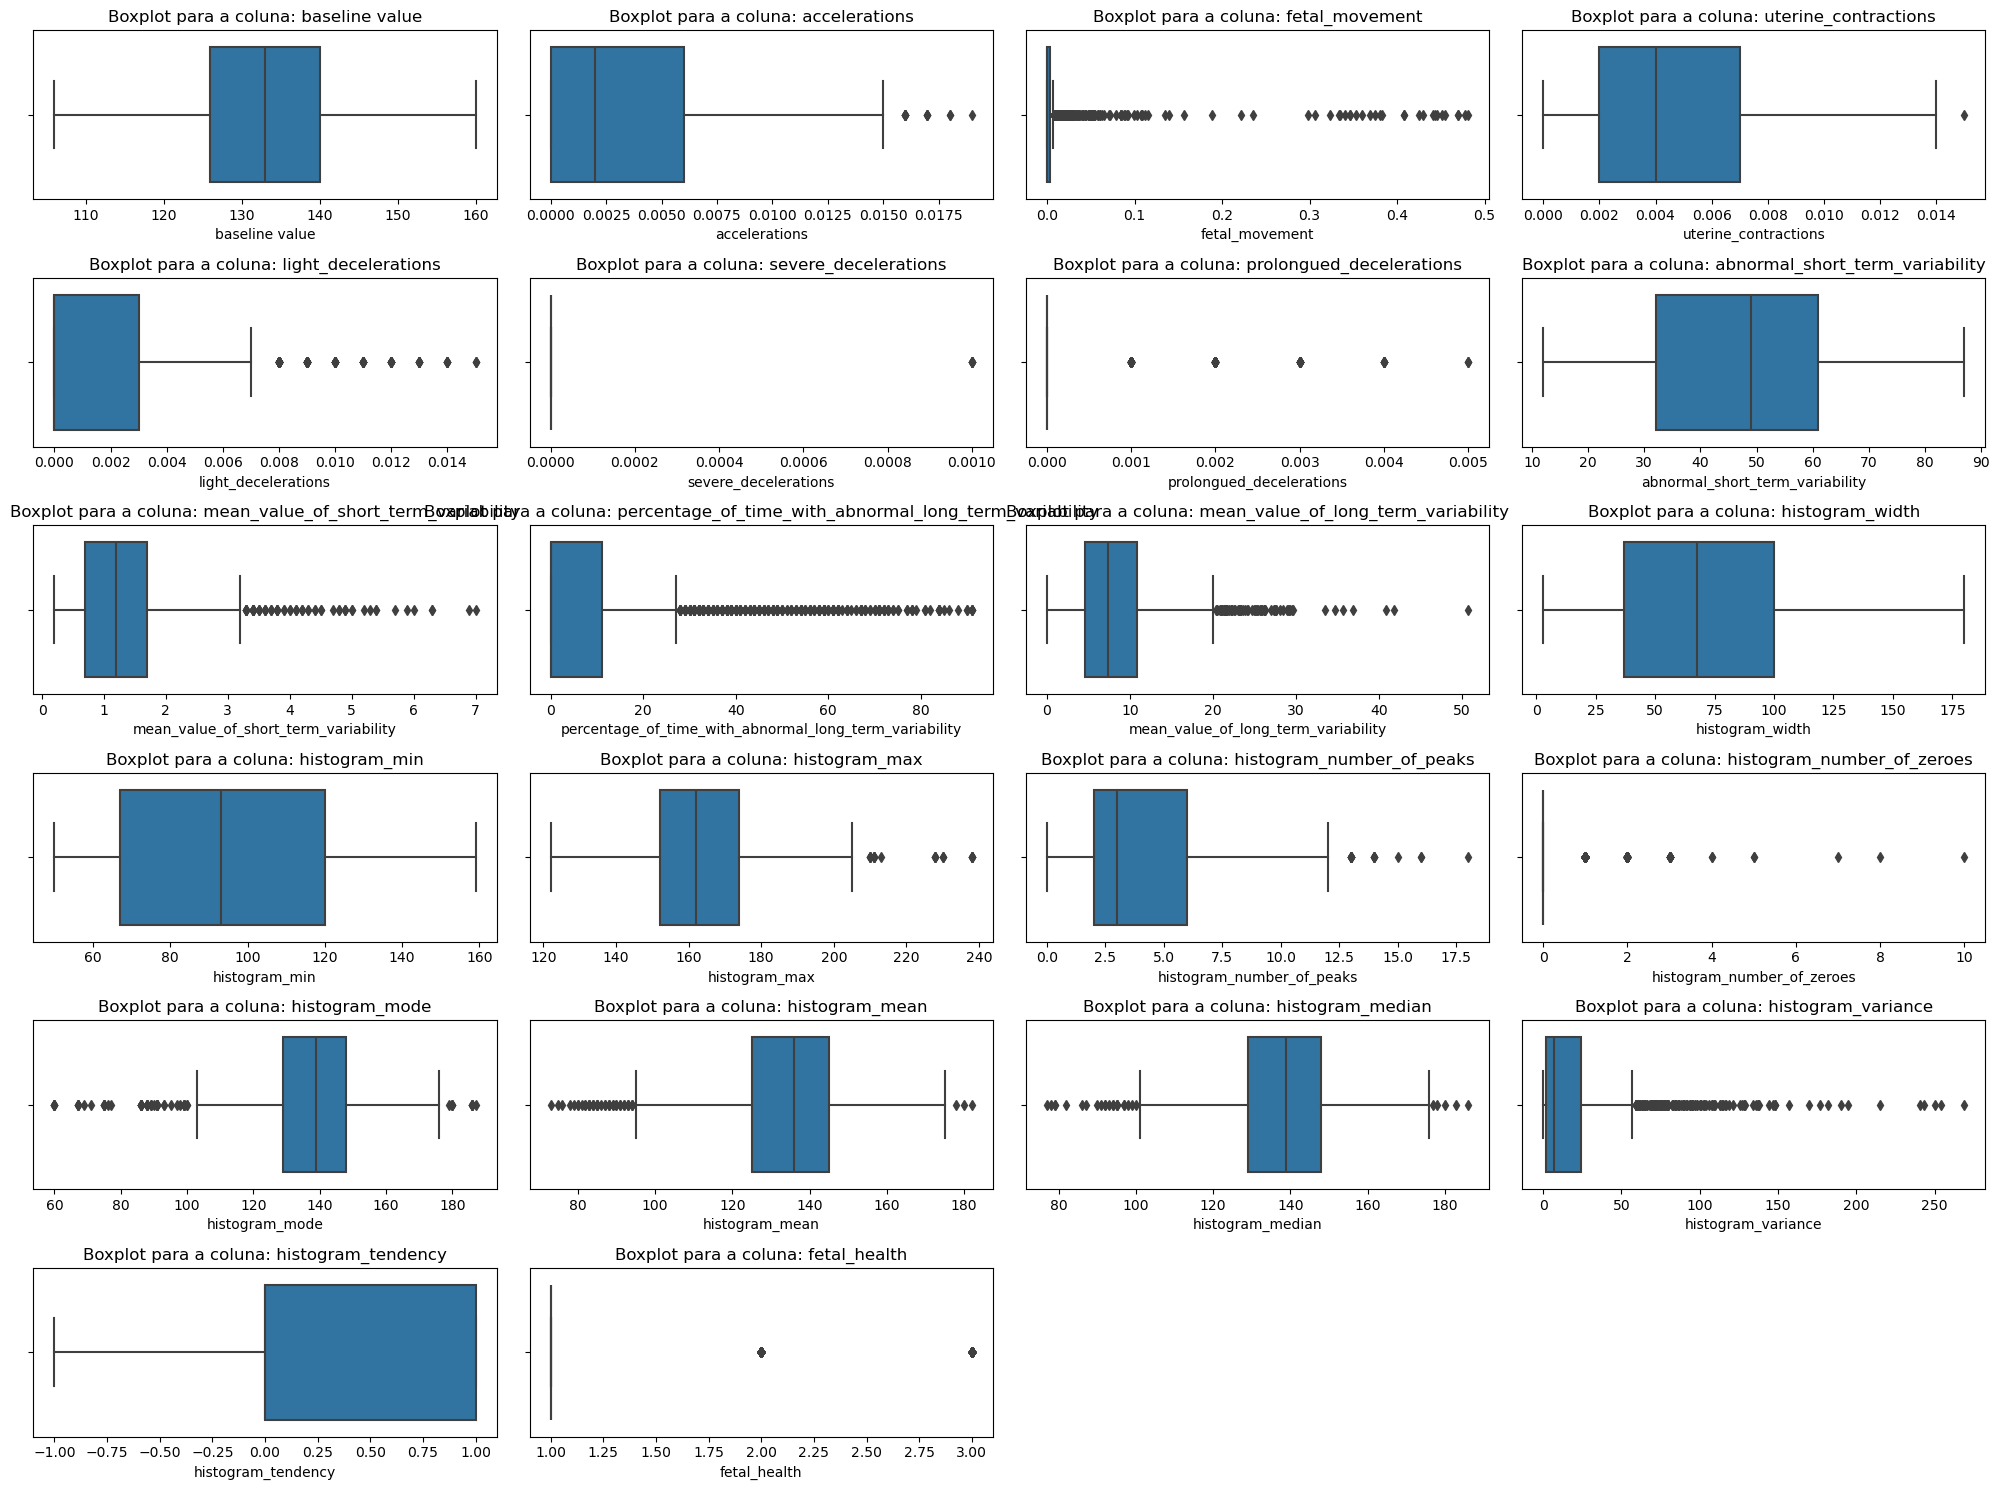

In [14]:
plt.figure(figsize=(20, 15))

# Crie subplots (6, 4) para cada coluna
for i, column in enumerate(df.columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot para a coluna: {column}')

# Ajuste o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()

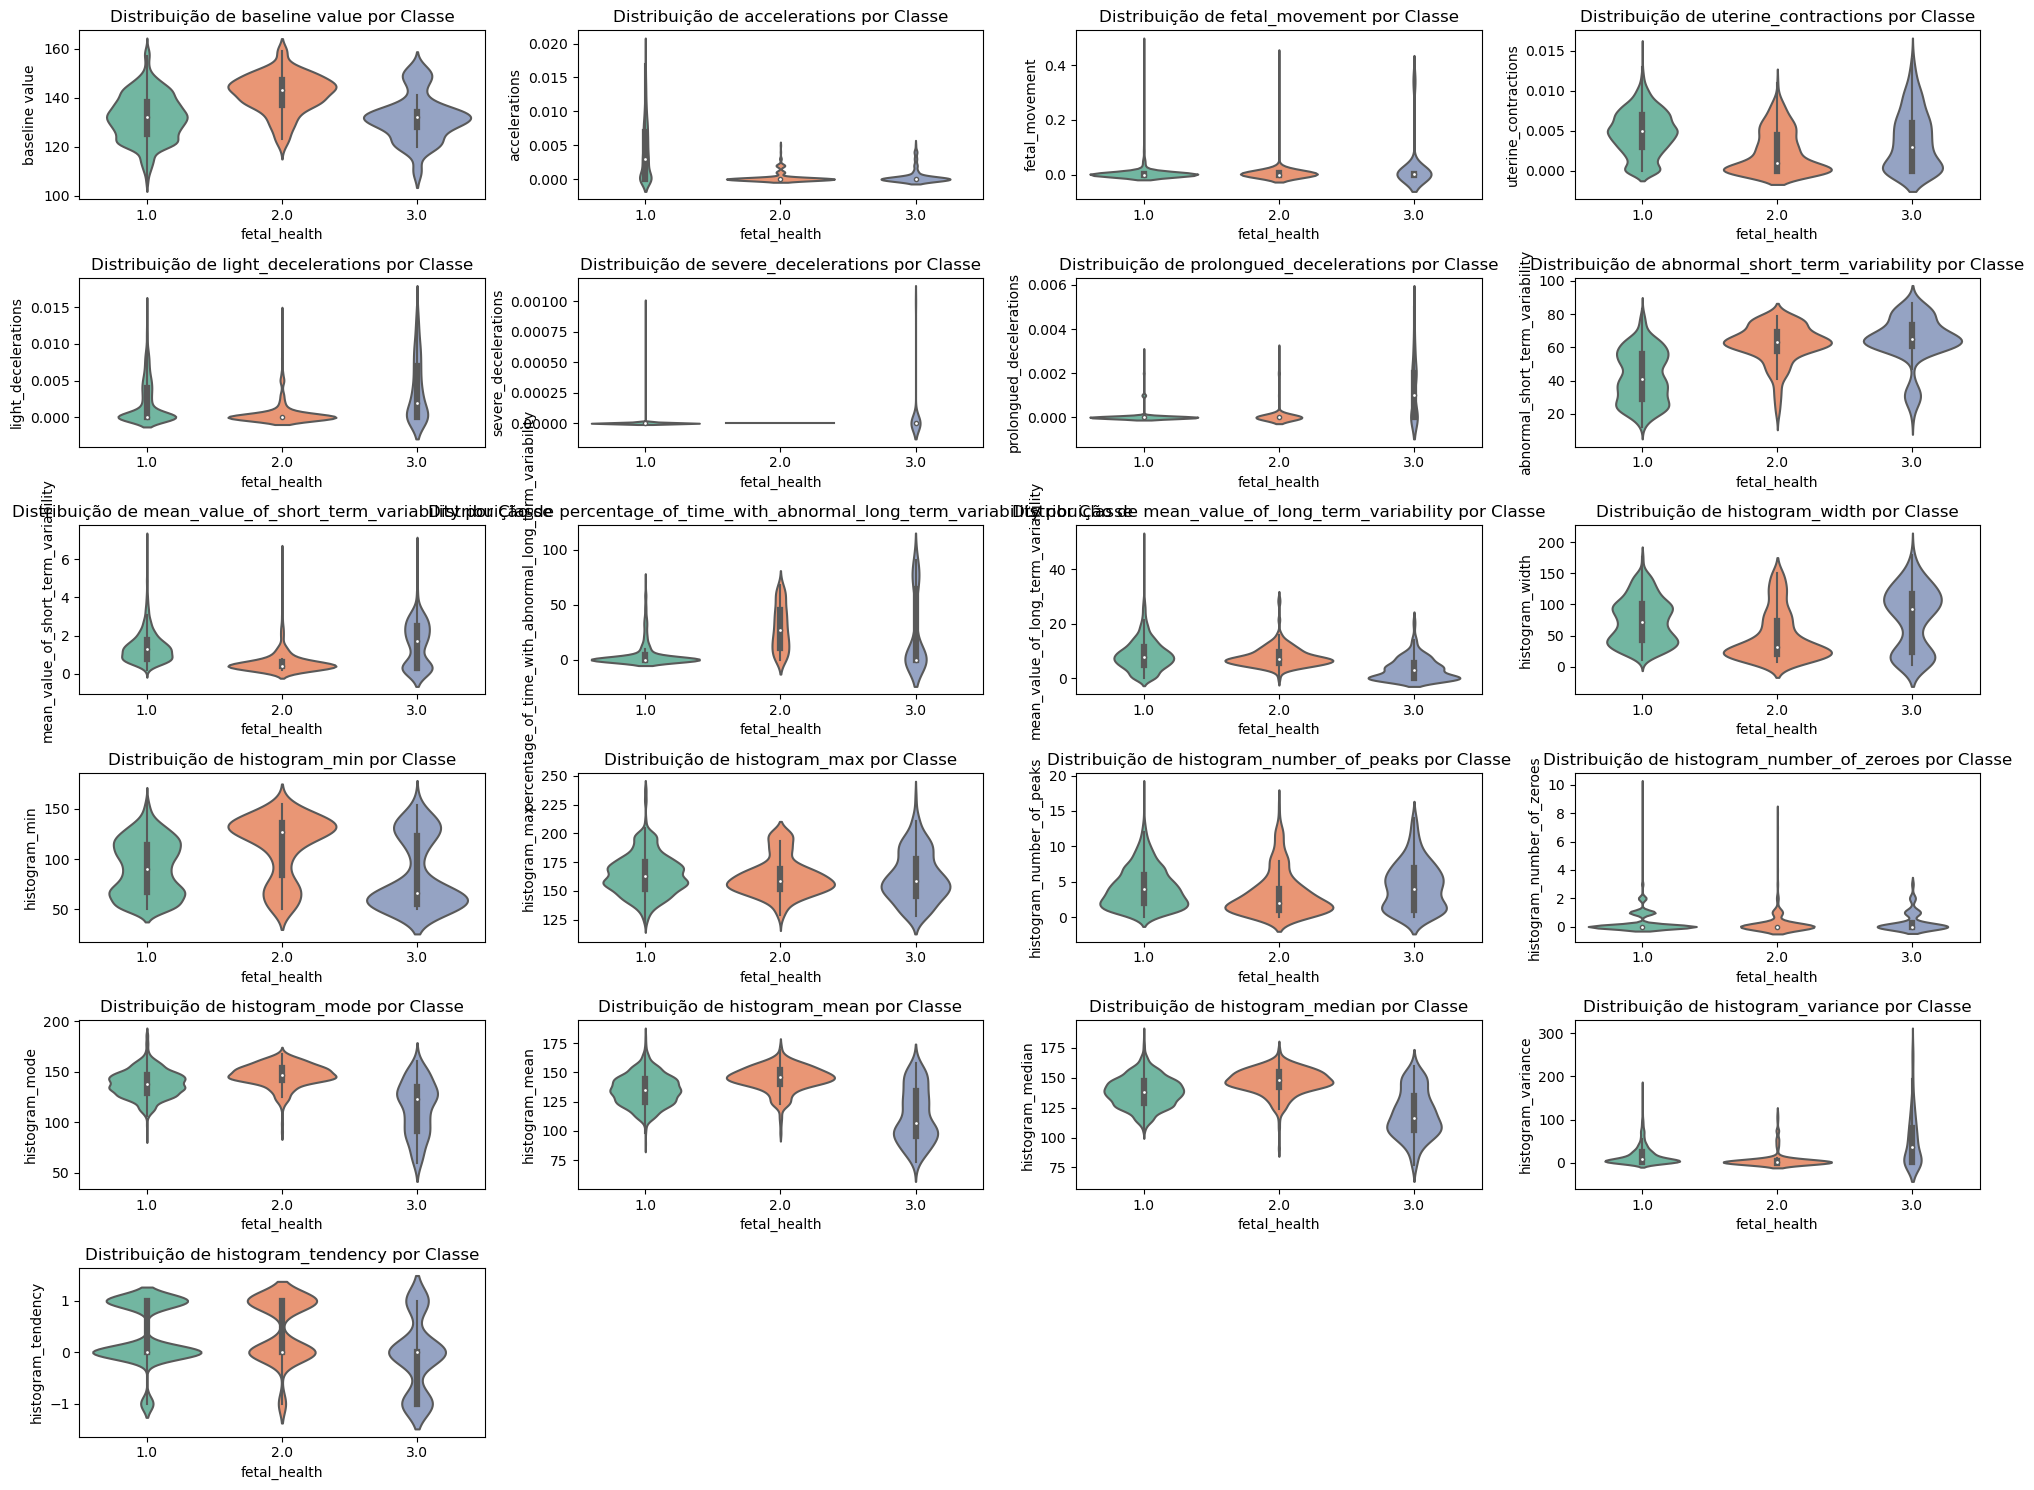

In [15]:
# Ajuste o tamanho da figura conforme necessário
plt.figure(figsize=(20, 15))

# Itera sobre cada coluna e cria um subplot com um gráfico de violino para cada classe
for i, column in enumerate(df.columns[:-1]):  # Ignorando a coluna de classe
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x='fetal_health', y=column, data=df, palette='Set2')
    plt.title(f'Distribuição de {column} por Classe')

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()

#### Normalização

In [16]:
# Inicialize o scaler
scaler = StandardScaler()

# Ajuste e transforme os dados
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#### Balanceamento de Classes (Testar com e sem)(atualmente sem)

In [17]:
# Verifique o balanceamento atual
print("Contagem de classes antes do balanceamento:", Counter(df['fetal_health']))

# Aplique SMOTE para balancear as classes
smote = SMOTE()
X,y=df.drop('fetal_health', axis=1), df['fetal_health']
X_resampled, y_resampled = smote.fit_resample(X,y)

# Verifique o balanceamento após o balanceamento
print("Contagem de classes após o balanceamento:", Counter(y_resampled))

Contagem de classes antes do balanceamento: Counter({1.0: 1655, 2.0: 295, 3.0: 176})
Contagem de classes após o balanceamento: Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


#### Divisão dos Dados

In [18]:
from sklearn.model_selection import train_test_split

# Divida os dados em conjunto de treinamento e teste
#Com balanceamento
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
#Sem balanceamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Seleção de Características (Vou testar com e sem)(agora ta sem)

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inicialize o modelo
model = LogisticRegression()

# Inicialize o seletor de características
rfe = RFE(model, n_features_to_select=10)

# Ajuste o seletor aos dados
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)


In [20]:
# Obtenha os índices das características selecionadas
selected_feature_indices = rfe.support_

# Obtenha os nomes das características selecionadas
selected_feature_names = X_train.columns[selected_feature_indices]

# Mostre os nomes das características selecionadas
print("Características Selecionadas:")
print(selected_feature_names)

Características Selecionadas:
Index(['baseline value', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_number_of_peaks',
       'histogram_mean', 'histogram_median', 'histogram_variance',
       'histogram_tendency'],
      dtype='object')


## **4. Modeling (Modelagem)**

### Funções auxiliares

In [21]:
def model_info(y_test, predictions):
    # Avalie o desempenho do modelo
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Converta a matriz de confusão para porcentagens
    conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Imprima métricas
    print(f'Acurácia: {accuracy}')
    print(f'Precisão: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print(f'Relatório de Classificação:\n{class_report}')

    # Visualize a matriz de confusão
    plt.figure(figsize=(8, 6))
    #Contagem
    #sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Suspeito', 'Patológico'], yticklabels=['Normal', 'Suspeito', 'Patológico'])
    #Porcentagem
    sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Normal', 'Suspeito', 'Patológico'], yticklabels=['Normal', 'Suspeito', 'Patológico'], cbar_kws={'label': 'Porcentagem'})
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

### Naive Bayes

Acurácia: 0.8028169014084507
Precisão: 0.8697646110381371
Recall: 0.8028169014084507
F1-score: 0.8204882327210581
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88       333
         2.0       0.50      0.89      0.64        64
         3.0       0.47      0.66      0.55        29

    accuracy                           0.80       426
   macro avg       0.65      0.78      0.69       426
weighted avg       0.87      0.80      0.82       426



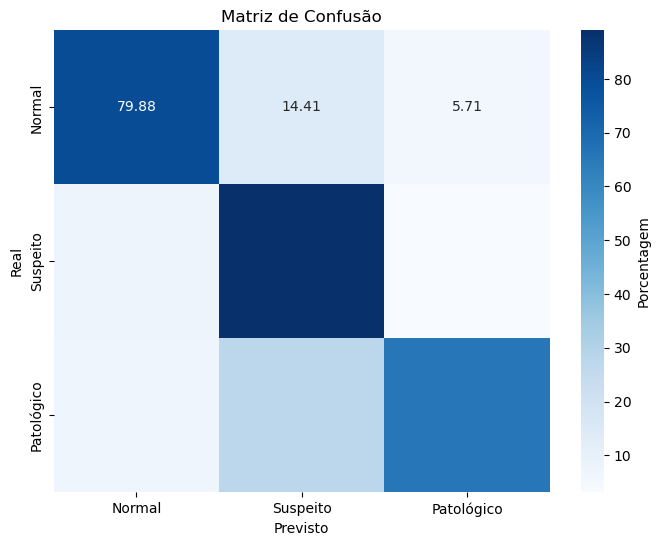

In [22]:
# Crie e treine o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Faça previsões
predictions = nb_model.predict(X_test)

# # Avalie o desempenho do modelo

model_info(y_test, predictions)

### Árvore de Decisão

Acurácia: 0.9225352112676056
Precisão: 0.9249259845629686
Recall: 0.9225352112676056
F1-score: 0.9235218354210515
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.81      0.78        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426



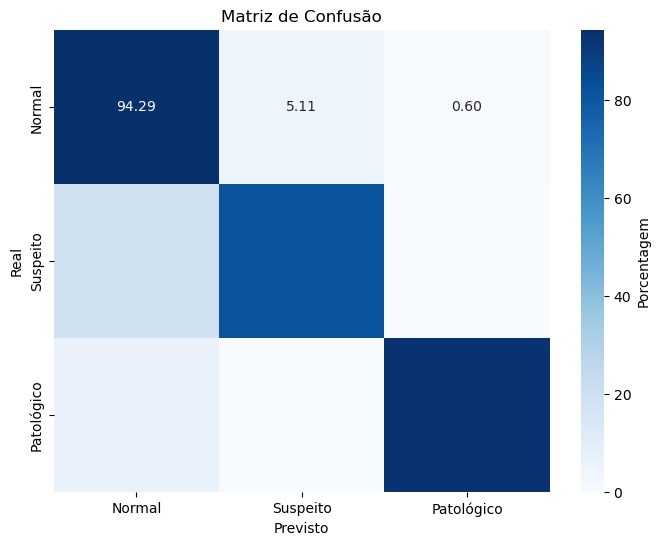

In [23]:
# Crie e treine o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Faça previsões
predictions = dt_model.predict(X_test)

# Avalie o desempenho do modelo

model_info(y_test, predictions)

### Linear Discriminant Analysis

Acurácia: 0.8826291079812206
Precisão: 0.8843765745384413
Recall: 0.8826291079812206
F1-score: 0.8820773588412834
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       333
         2.0       0.64      0.70      0.67        64
         3.0       0.81      0.59      0.68        29

    accuracy                           0.88       426
   macro avg       0.80      0.74      0.76       426
weighted avg       0.88      0.88      0.88       426



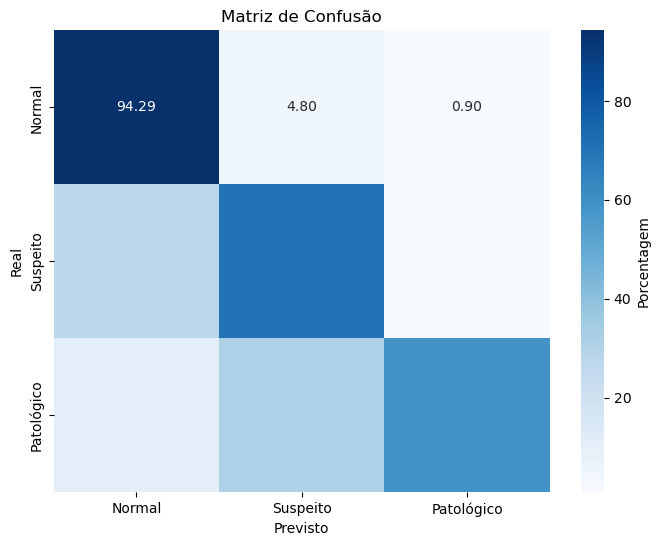

In [24]:
# Crie e treine o modelo LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Faça previsões
predictions = lda_model.predict(X_test)

# Avalie o desempenho do modelo

model_info(y_test, predictions)

### Support Vector Machine

Acurácia: 0.8732394366197183
Precisão: 0.8672850979378315
Recall: 0.8732394366197183
F1-score: 0.8694771848805339
Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



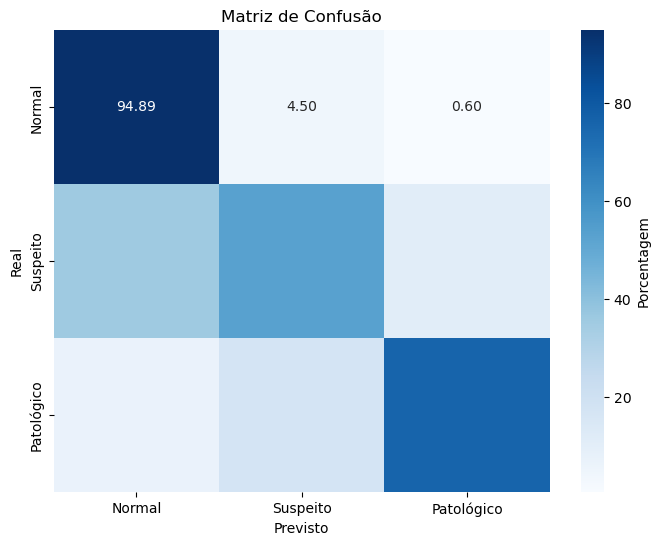

In [25]:
# Crie e treine o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Faça previsões
predictions = svm_model.predict(X_test)

# Avalie o desempenho do modelo

model_info(y_test, predictions)

# **Resultados Experimentais e Análise**

## **5. Evaluation (Validação)**


# **Conclusão e Perspectivas**